Importing Libraries

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading Files

In [60]:
#datasets from :  https://www.kaggle.com/giripujar/hr-analytics
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [61]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<ipython-input-62-f39131a719c9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True , fmt = '.1f')


<Axes: >

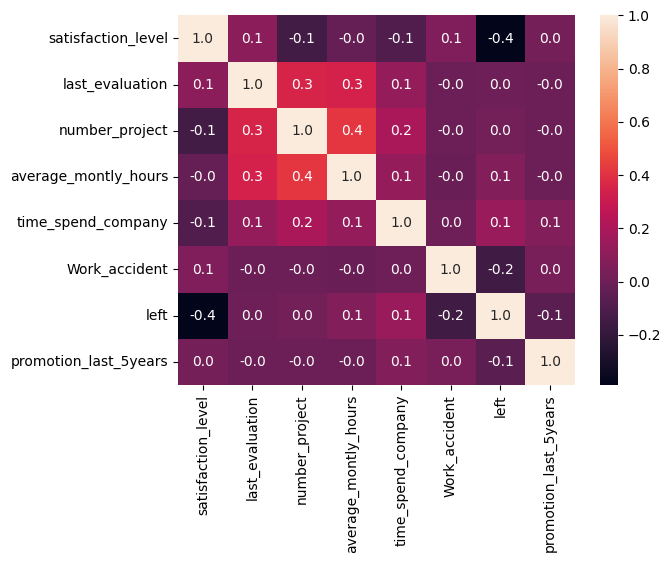

In [62]:
sns.heatmap(df.corr(), annot = True , fmt = '.1f')

For numarical featuers, we can crearlly see from correlation matrix that there is no relation between "left and last_evaluation", and "left and number_project" so, we can drop this two column

In [63]:
df.drop('last_evaluation',axis = 1 , inplace = True)
df.drop('number_project',axis = 1 , inplace = True)
df

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,157,3,0,1,0,sales,low
1,0.80,262,6,0,1,0,sales,medium
2,0.11,272,4,0,1,0,sales,medium
3,0.72,223,5,0,1,0,sales,low
4,0.37,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,1,0,support,low
14995,0.37,160,3,0,1,0,support,low
14996,0.37,143,3,0,1,0,support,low
14997,0.11,280,4,0,1,0,support,low


<Axes: xlabel='salary'>

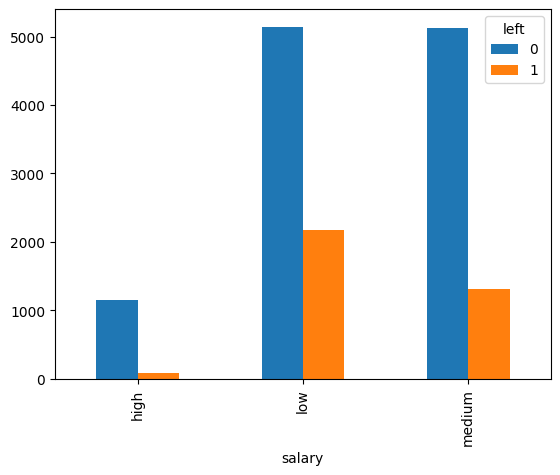

In [64]:
pd.crosstab(df.salary, df.left).plot(kind = 'bar')

<Axes: xlabel='Department'>

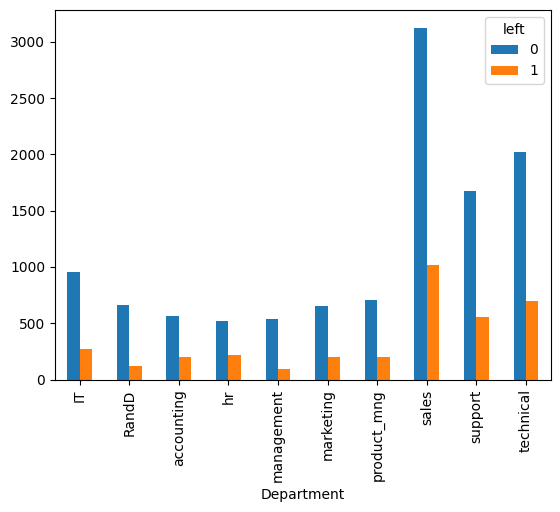

In [65]:
pd.crosstab(df['Department'] , df['left']).plot(kind = 'bar')

So, we see from bar char, salary has huge varience though depertment has some varience ; let's work with both...

In [66]:
df.describe()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<ipython-input-67-27b4707b93c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_montly_hours'])


<Axes: xlabel='average_montly_hours', ylabel='Density'>

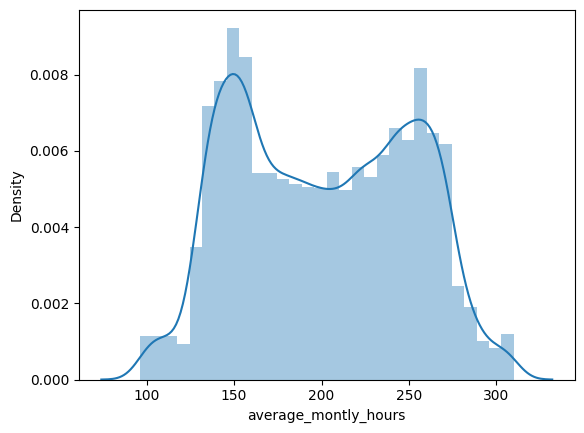

In [67]:
sns.distplot(df['average_montly_hours'])

<Axes: xlabel='average_montly_hours'>

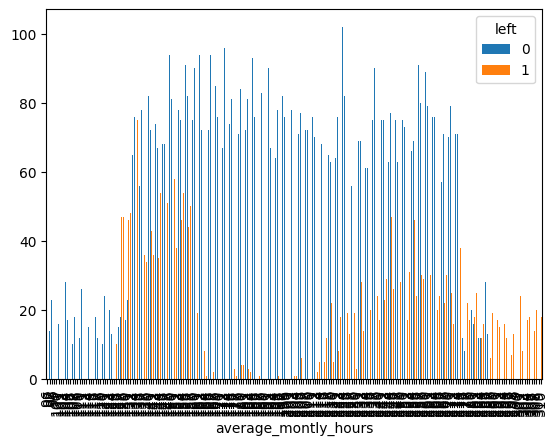

In [68]:
pd.crosstab(df.average_montly_hours, df.left).plot(kind = 'bar')

Text(0, 0.5, 'Frequency')

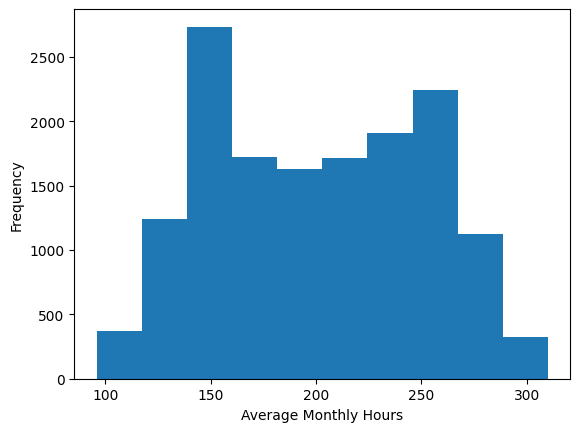

In [69]:
#visualize with histogram:
plt.hist(df.average_montly_hours)
plt.xlabel("Average Monthly Hours")
plt.ylabel("Frequency")

0        5.062595
1        5.572154
2        5.609472
3        5.411646
4        5.075174
           ...   
14994    5.023881
14995    5.081404
14996    4.969813
14997    5.638355
14998    5.068904
Name: average_montly_hours, Length: 14999, dtype: float64


(array([ 197.,  226.,  974., 2037., 1892., 1759., 1798., 2425., 2982.,
         709.]),
 array([4.57471098, 4.69121917, 4.80772737, 4.92423556, 5.04074375,
        5.15725195, 5.27376014, 5.39026833, 5.50677653, 5.62328472,
        5.73979291]),
 <BarContainer object of 10 artists>)

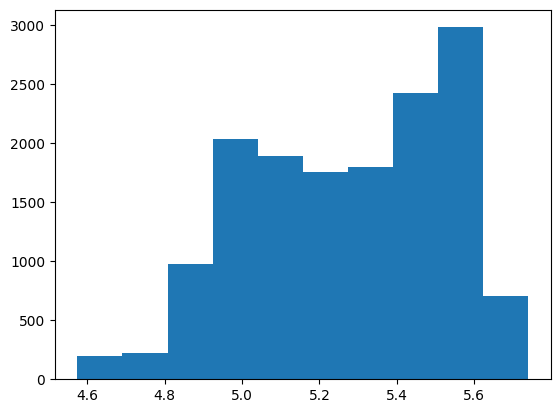

In [15]:
#log Transformation:
# Assuming 'column_data' is your column of interest
t_log = np.log1p(df['average_montly_hours'])
print(t_log)
plt.hist(t_log)



0        12.529964
1        16.186414
2        16.492423
3        14.933185
4        12.609520
           ...    
14994    12.288206
14995    12.649111
14996    11.958261
14997    16.733201
14998    12.569805
Name: average_montly_hours, Length: 14999, dtype: float64


(array([ 271.,  440., 1963., 2151., 1713., 1663., 1868., 2454., 2009.,
         467.]),
 array([ 9.79795897, 10.57884476, 11.35973055, 12.14061634, 12.92150213,
        13.70238792, 14.48327371, 15.26415949, 16.04504528, 16.82593107,
        17.60681686]),
 <BarContainer object of 10 artists>)

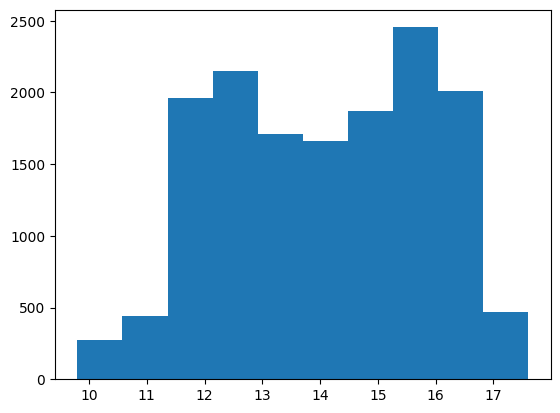

In [16]:
#Square Root Transform:
t_sqrt= np.sqrt(df.average_montly_hours)
print(t_sqrt)
plt.hist(t_sqrt)


Val : [42.82358006 52.9111054  53.80394246 ... 41.35830854 54.51109554
 42.92695958]




(array([ 325.,  701., 2408., 1988., 1663., 1632., 1981., 2345., 1546.,
         410.]),
 array([36.16075756, 38.25566447, 40.35057138, 42.44547829, 44.54038521,
        46.63529212, 48.73019903, 50.82510594, 52.92001285, 55.01491976,
        57.10982668]),
 <BarContainer object of 10 artists>)

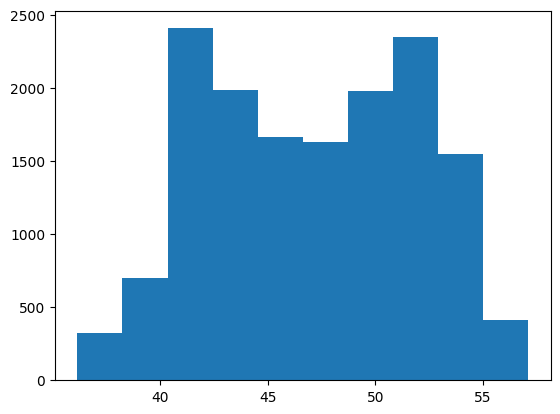

In [19]:
#Box-Cox:
from scipy.stats import boxcox

# Shift the data if it contains zeros or negative values
shifted_data = df.average_montly_hours + abs(min(df.average_montly_hours)) + 1

t_bcx, lambda_value = boxcox(shifted_data)
print("Val :" ,t_bcx)
print('\n')
plt.hist(t_bcx)


0       -0.648724
1        1.102440
2        1.490335
3        0.282216
4       -0.598435
           ...   
14994   -0.823172
14995   -0.573115
14996   -1.077446
14997    1.767903
14998   -0.622621
Name: average_montly_hours, Length: 14999, dtype: float64


(array([   6.,    0.,  275., 2031., 5212., 5331., 1854.,  272.,    0.,
          18.]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

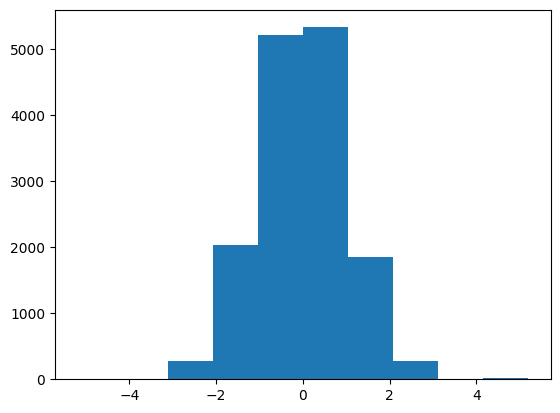

In [32]:
#normalize has to be done after splitting datasets, so don't execute this code now....
#Quantile Transform
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='normal')
df['average_montly_hours'] = transformer.fit_transform(df[['average_montly_hours']])

print(df.average_montly_hours)
plt.hist(df.average_montly_hours)

In [70]:
#pd.crosstab(df.average_montly_hours, df.left).plot(kind = 'bar')
df

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,157,3,0,1,0,sales,low
1,0.80,262,6,0,1,0,sales,medium
2,0.11,272,4,0,1,0,sales,medium
3,0.72,223,5,0,1,0,sales,low
4,0.37,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,1,0,support,low
14995,0.37,160,3,0,1,0,support,low
14996,0.37,143,3,0,1,0,support,low
14997,0.11,280,4,0,1,0,support,low


<ipython-input-71-03f12331f0f9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['time_spend_company'])


<Axes: xlabel='time_spend_company', ylabel='Density'>

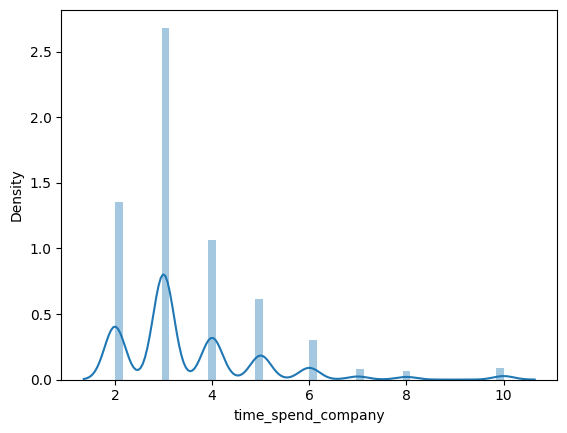

In [71]:
sns.distplot(df['time_spend_company'])

<Axes: xlabel='time_spend_company'>

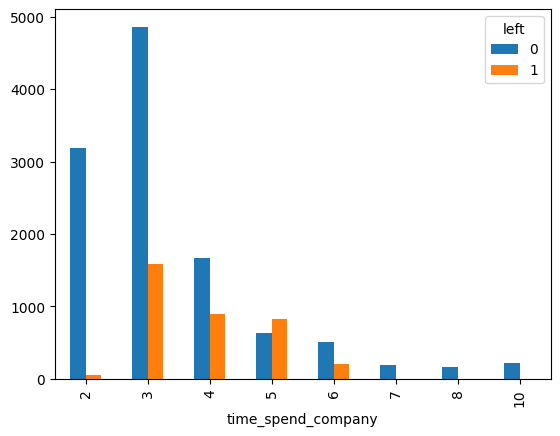

In [72]:
pd.crosstab(df.time_spend_company, df.left).plot(kind = 'bar')

A conclution, that all the 1's comes from 2-6 time spand. So, 2-6 = onState, 7 - 10 = offState; let's apply the concept of Data Binning

In [73]:
groupName = ['changeState', 'noChange']
binRange = [2.00 , 6.00 , 10.00]
df['time_spend_binned'] = pd.cut(df['time_spend_company'], binRange , labels = groupName , include_lowest = True)
df[['time_spend_company','time_spend_binned']].head(10)

,time_spend_company,time_spend_binned
0,3,changeState
1,6,changeState
2,4,changeState
3,5,changeState
4,3,changeState
5,3,changeState
6,4,changeState
7,5,changeState
8,5,changeState
9,3,changeState


In [74]:
df.drop('time_spend_company' , axis = 1 , inplace = True)
df

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,Department,salary,time_spend_binned
0,0.38,157,0,1,0,sales,low,changeState
1,0.80,262,0,1,0,sales,medium,changeState
2,0.11,272,0,1,0,sales,medium,changeState
3,0.72,223,0,1,0,sales,low,changeState
4,0.37,159,0,1,0,sales,low,changeState
...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,support,low,changeState
14995,0.37,160,0,1,0,support,low,changeState
14996,0.37,143,0,1,0,support,low,changeState
14997,0.11,280,0,1,0,support,low,changeState


In [75]:
time_dummies = pd.get_dummies(df['time_spend_binned'] , prefix = 'Time')
df = pd.concat([df,time_dummies] , axis = 1 )
df

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,Department,salary,time_spend_binned,Time_changeState,Time_noChange
0,0.38,157,0,1,0,sales,low,changeState,1,0
1,0.80,262,0,1,0,sales,medium,changeState,1,0
2,0.11,272,0,1,0,sales,medium,changeState,1,0
3,0.72,223,0,1,0,sales,low,changeState,1,0
4,0.37,159,0,1,0,sales,low,changeState,1,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,support,low,changeState,1,0
14995,0.37,160,0,1,0,support,low,changeState,1,0
14996,0.37,143,0,1,0,support,low,changeState,1,0
14997,0.11,280,0,1,0,support,low,changeState,1,0


In [76]:
df.drop('time_spend_binned', axis = 1 , inplace = True)
df

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,Department,salary,Time_changeState,Time_noChange
0,0.38,157,0,1,0,sales,low,1,0
1,0.80,262,0,1,0,sales,medium,1,0
2,0.11,272,0,1,0,sales,medium,1,0
3,0.72,223,0,1,0,sales,low,1,0
4,0.37,159,0,1,0,sales,low,1,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,support,low,1,0
14995,0.37,160,0,1,0,support,low,1,0
14996,0.37,143,0,1,0,support,low,1,0
14997,0.11,280,0,1,0,support,low,1,0


we have to standardize on column - time_spend_company , average_months_hours & apply one hot encoding in salary....also remove department as less importanced

In [77]:

dep_dummies = pd.get_dummies(df['Department'] , prefix = 'Dep')
df = pd.concat([df,dep_dummies] , axis = 1 )
#df.drop('average_montly_hours' , axis = 1 , inplace = True)
#df.drop('time_spend_company' , axis = 1 , inplace = True)
df

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,Department,salary,Time_changeState,Time_noChange,Dep_IT,Dep_RandD,Dep_accounting,Dep_hr,Dep_management,Dep_marketing,Dep_product_mng,Dep_sales,Dep_support,Dep_technical
0,0.38,157,0,1,0,sales,low,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,262,0,1,0,sales,medium,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,272,0,1,0,sales,medium,1,0,0,0,0,0,0,0,0,1,0,0
3,0.72,223,0,1,0,sales,low,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,159,0,1,0,sales,low,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,support,low,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,160,0,1,0,support,low,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,143,0,1,0,support,low,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,280,0,1,0,support,low,1,0,0,0,0,0,0,0,0,0,1,0


In [78]:
df.drop('Department' , axis = 1 , inplace = True)
salary_dummies = pd.get_dummies(df['salary'] , prefix = 'salary')
df = pd.concat([df,salary_dummies] , axis = 1 )
df

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,salary,Time_changeState,Time_noChange,Dep_IT,Dep_RandD,...,Dep_hr,Dep_management,Dep_marketing,Dep_product_mng,Dep_sales,Dep_support,Dep_technical,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0,low,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,262,0,1,0,medium,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,272,0,1,0,medium,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,223,0,1,0,low,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,159,0,1,0,low,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,low,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,160,0,1,0,low,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,143,0,1,0,low,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,280,0,1,0,low,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [79]:
df.drop('salary' , axis = 1 , inplace = True)
df

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,Time_changeState,Time_noChange,Dep_IT,Dep_RandD,Dep_accounting,Dep_hr,Dep_management,Dep_marketing,Dep_product_mng,Dep_sales,Dep_support,Dep_technical,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,262,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,272,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,223,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,159,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,160,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,143,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,280,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [80]:
df

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,Time_changeState,Time_noChange,Dep_IT,Dep_RandD,Dep_accounting,Dep_hr,Dep_management,Dep_marketing,Dep_product_mng,Dep_sales,Dep_support,Dep_technical,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,262,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,272,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,223,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,159,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,160,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,143,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,280,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [81]:
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [82]:
df.drop('left' , axis = 1 , inplace = True)

In [83]:
X = df
X

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,Time_changeState,Time_noChange,Dep_IT,Dep_RandD,Dep_accounting,Dep_hr,Dep_management,Dep_marketing,Dep_product_mng,Dep_sales,Dep_support,Dep_technical,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,262,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,272,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,223,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,159,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,160,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,143,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,280,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 3)

Feature Scaling(z-score): range = -3 <= x <= 3

In [85]:
X_train

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,Time_changeState,Time_noChange,Dep_IT,Dep_RandD,Dep_accounting,Dep_hr,Dep_management,Dep_marketing,Dep_product_mng,Dep_sales,Dep_support,Dep_technical,salary_high,salary_low,salary_medium
10858,0.53,259,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1324,0.76,254,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
524,0.75,221,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2726,0.16,227,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3966,0.82,202,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,0.23,149,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9859,0.72,243,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
11513,0.98,199,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1688,0.41,155,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [86]:
y_train

10858    0
1324     1
524      1
2726     0
3966     0
        ..
9160     0
9859     0
11513    0
1688     1
5994     0
Name: left, Length: 10499, dtype: int64

Normalization on average_monthly_hours column

In [87]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='normal')
X_train['average_montly_hours'] = transformer.fit_transform(X_train[['average_montly_hours']])
X_test['average_montly_hours'] = transformer.transform(X_test[['average_montly_hours']])

Apply Logistic Regression:

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [89]:
model.score(X_test, y_test)

0.7824444444444445

In [90]:
y_predict = model.predict(X_test)

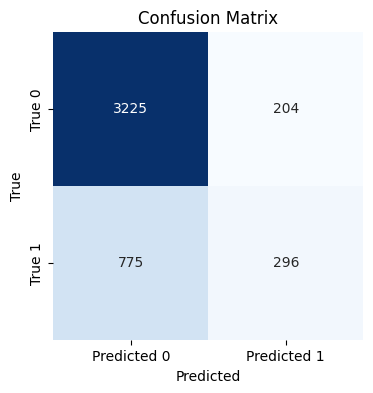

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix & others performance
conf_matrix = confusion_matrix(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1_m = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
specificity = true_negatives / (true_negatives + false_positives)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [92]:
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_m:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.5920
Recall: 0.2764
F1 Score: 0.3768
Specificity: 0.9405
Accuracy: 0.7824


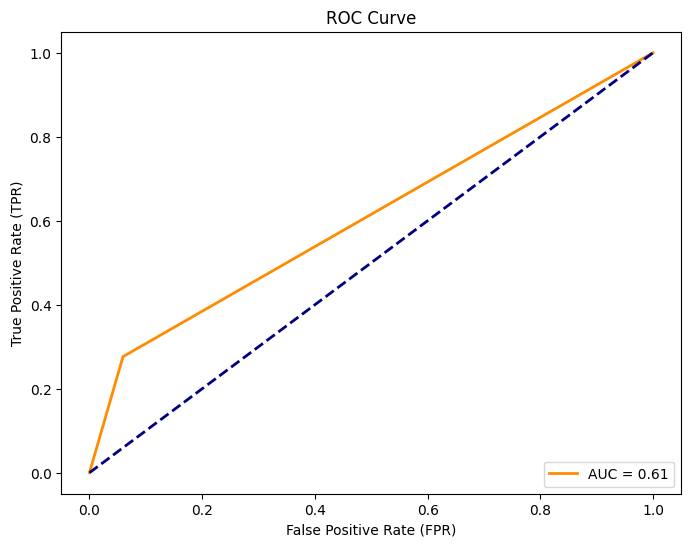

In [93]:
from sklearn.metrics import roc_curve, auc


# Calculate ROC curve
#fpr = false positive rate
#tpr = true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
